<a href="https://colab.research.google.com/github/haricharanvihari/extensive_viz/blob/master/S10_DNN/S10_EVA4S10F10_Haricharan_Vihari_N_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model

In [1]:
!pip install albumentations==0.4.5

import torch
import torch.nn as nn
import torch.nn.functional as F

!pip install torchsummary
from torchsummary import summary

from models.resnet18 import ResNet18

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

     |████████████████████████████████| 122kB 2.9MB/s 
     |████████████████████████████████| 634kB 8.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64378 sha256=4340862023d5a1b3c6b72ed8000f78c2f439e85e80ea8178cb0bca3b9d4925d8
  Stored in directory: /root/.cache/pip/wheels/f0/a0/61/e50f93165a5ec7e7f5d65064e513239505bc4c06d2289557d3
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=32ed52fc5126344cd9df57c1c5978f511b6776773acde881fabdff10e868cea9
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
cuda
----------------------------------------------

## Run the Model

In [0]:
%matplotlib inline

In [3]:
import torch.nn as nn

from dataloader import ImageData
from models.resnet18 import ResNet18
from datamodel import DataModel
from optimizer import OptimizerFactory

from torch.optim.lr_scheduler import ReduceLROnPlateau

# Loading data and transforming it
img_data = ImageData()

# Choose from "albumentations" or "pytorch". Default is "pytorch"
img_data.load("albumentations")

criterion = nn.CrossEntropyLoss()

# optimizer can be choose from "SGD" & "Adam"
optim_sgd = OptimizerFactory("SGD")
optimizer = optim_sgd.load(params=model.parameters(), lr=0.001, momentum=0.9, weight_decay=5e-4)

scheduler = ReduceLROnPlateau(optimizer, mode='min')

# training the dataset and then running test
dm = DataModel(img_data, criterion, optimizer, scheduler, num_of_epochs = 50, cal_misclassified = True)
dm.run_model(model, device)

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3349717855453491 Batch_id=390 Accuracy=41.41: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 5162/10000 (51.62%)

EPOCH: 2


Loss=1.0080026388168335 Batch_id=390 Accuracy=56.52: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0115, Accuracy: 5882/10000 (58.82%)

EPOCH: 3


Loss=0.9622063636779785 Batch_id=390 Accuracy=63.88: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0105, Accuracy: 6331/10000 (63.31%)

EPOCH: 4


Loss=0.7594167590141296 Batch_id=390 Accuracy=68.58: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 7171/10000 (71.71%)

EPOCH: 5


Loss=0.6825228929519653 Batch_id=390 Accuracy=72.10: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0076, Accuracy: 7349/10000 (73.49%)

EPOCH: 6


Loss=0.6762664914131165 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7628/10000 (76.28%)

EPOCH: 7


Loss=0.6796187162399292 Batch_id=390 Accuracy=77.26: 100%|██████████| 391/391 [00:31<00:00, 12.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7689/10000 (76.89%)

EPOCH: 8


Loss=0.7521933317184448 Batch_id=390 Accuracy=78.82: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0085, Accuracy: 7159/10000 (71.59%)

EPOCH: 9


Loss=0.6837385892868042 Batch_id=390 Accuracy=80.34: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 7841/10000 (78.41%)

EPOCH: 10


Loss=0.5797874927520752 Batch_id=390 Accuracy=81.64: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8081/10000 (80.81%)

EPOCH: 11


Loss=0.5347126722335815 Batch_id=390 Accuracy=82.65: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8245/10000 (82.45%)

EPOCH: 12


Loss=0.5521653294563293 Batch_id=390 Accuracy=83.80: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8169/10000 (81.69%)

EPOCH: 13


Loss=0.4315493702888489 Batch_id=390 Accuracy=84.63: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8323/10000 (83.23%)

EPOCH: 14


Loss=0.3327036499977112 Batch_id=390 Accuracy=85.47: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8202/10000 (82.02%)

EPOCH: 15


Loss=0.4651811122894287 Batch_id=390 Accuracy=86.50: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8030/10000 (80.30%)

EPOCH: 16


Loss=0.3037870526313782 Batch_id=390 Accuracy=87.00: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8347/10000 (83.47%)

EPOCH: 17


Loss=0.2603778839111328 Batch_id=390 Accuracy=87.65: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8379/10000 (83.79%)

EPOCH: 18


Loss=0.3138032555580139 Batch_id=390 Accuracy=88.33: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8332/10000 (83.32%)

EPOCH: 19


Loss=0.27469223737716675 Batch_id=390 Accuracy=88.94: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8481/10000 (84.81%)

EPOCH: 20


Loss=0.31052201986312866 Batch_id=390 Accuracy=89.60: 100%|██████████| 391/391 [00:31<00:00, 12.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8171/10000 (81.71%)

EPOCH: 21


Loss=0.23589619994163513 Batch_id=390 Accuracy=89.99: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8484/10000 (84.84%)

EPOCH: 22


Loss=0.46037331223487854 Batch_id=390 Accuracy=90.53: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8344/10000 (83.44%)

EPOCH: 23


Loss=0.19947616755962372 Batch_id=390 Accuracy=90.96: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8563/10000 (85.63%)

EPOCH: 24


Loss=0.3154069483280182 Batch_id=390 Accuracy=91.28: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8460/10000 (84.60%)

EPOCH: 25


Loss=0.429457426071167 Batch_id=390 Accuracy=91.59: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 8419/10000 (84.19%)

EPOCH: 26


Loss=0.2562624216079712 Batch_id=390 Accuracy=92.13: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8560/10000 (85.60%)

EPOCH: 27


Loss=0.26788169145584106 Batch_id=390 Accuracy=92.34: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8524/10000 (85.24%)

EPOCH: 28


Loss=0.33473071455955505 Batch_id=390 Accuracy=92.73: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8534/10000 (85.34%)

EPOCH: 29


Loss=0.09922245144844055 Batch_id=390 Accuracy=93.01: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8623/10000 (86.23%)

EPOCH: 30


Loss=0.18305660784244537 Batch_id=390 Accuracy=93.15: 100%|██████████| 391/391 [00:31<00:00, 12.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8450/10000 (84.50%)

EPOCH: 31


Loss=0.21755942702293396 Batch_id=390 Accuracy=93.32: 100%|██████████| 391/391 [00:31<00:00, 12.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8537/10000 (85.37%)

EPOCH: 32


Loss=0.14844155311584473 Batch_id=390 Accuracy=93.81: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8628/10000 (86.28%)

EPOCH: 33


Loss=0.17631705105304718 Batch_id=390 Accuracy=94.33: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8540/10000 (85.40%)

EPOCH: 34


Loss=0.19602325558662415 Batch_id=390 Accuracy=94.05: 100%|██████████| 391/391 [00:31<00:00, 12.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8503/10000 (85.03%)

EPOCH: 35


Loss=0.13599784672260284 Batch_id=390 Accuracy=95.99: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8816/10000 (88.16%)

EPOCH: 36


Loss=0.12429113686084747 Batch_id=390 Accuracy=96.54: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8838/10000 (88.38%)

EPOCH: 37


Loss=0.08206915110349655 Batch_id=390 Accuracy=96.69: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8856/10000 (88.56%)

EPOCH: 38


Loss=0.2513315677642822 Batch_id=390 Accuracy=96.64: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8873/10000 (88.73%)

EPOCH: 39


Loss=0.16814768314361572 Batch_id=390 Accuracy=96.89: 100%|██████████| 391/391 [00:31<00:00, 12.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8850/10000 (88.50%)

EPOCH: 40


Loss=0.14304804801940918 Batch_id=390 Accuracy=97.09: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8867/10000 (88.67%)

EPOCH: 41


Loss=0.11734335124492645 Batch_id=390 Accuracy=97.15: 100%|██████████| 391/391 [00:31<00:00, 12.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8864/10000 (88.64%)

EPOCH: 42


Loss=0.060275398194789886 Batch_id=390 Accuracy=97.24: 100%|██████████| 391/391 [00:31<00:00, 12.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8846/10000 (88.46%)

EPOCH: 43


Loss=0.13759258389472961 Batch_id=390 Accuracy=97.20: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8862/10000 (88.62%)

EPOCH: 44


Loss=0.1235397458076477 Batch_id=390 Accuracy=97.33: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8872/10000 (88.72%)

EPOCH: 45


Loss=0.12715654075145721 Batch_id=390 Accuracy=97.30: 100%|██████████| 391/391 [00:31<00:00, 12.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8855/10000 (88.55%)

EPOCH: 46


Loss=0.05340633541345596 Batch_id=390 Accuracy=97.30: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8850/10000 (88.50%)

EPOCH: 47


Loss=0.16528567671775818 Batch_id=390 Accuracy=97.27: 100%|██████████| 391/391 [00:31<00:00, 12.48it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8859/10000 (88.59%)

EPOCH: 48


Loss=0.038464777171611786 Batch_id=390 Accuracy=97.42: 100%|██████████| 391/391 [00:31<00:00, 12.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8850/10000 (88.50%)

EPOCH: 49


Loss=0.089359350502491 Batch_id=390 Accuracy=97.47: 100%|██████████| 391/391 [00:31<00:00, 12.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8865/10000 (88.65%)

EPOCH: 50


Loss=0.06397217512130737 Batch_id=390 Accuracy=97.56: 100%|██████████| 391/391 [00:31<00:00, 12.54it/s]



Test set: Average loss: 0.0038, Accuracy: 8883/10000 (88.83%)



## Plotting Test & Train Accuracy

[41.41, 56.518, 63.88, 68.576, 72.096, 74.902, 77.26, 78.818, 80.336, 81.638, 82.654, 83.798, 84.628, 85.472, 86.5, 87.002, 87.65, 88.33, 88.938, 89.6, 89.994, 90.528, 90.962, 91.278, 91.59, 92.13, 92.344, 92.728, 93.006, 93.15, 93.322, 93.812, 94.332, 94.05, 95.992, 96.54, 96.69, 96.642, 96.892, 97.092, 97.152, 97.242, 97.204, 97.326, 97.3, 97.3, 97.268, 97.424, 97.47, 97.558]
[51.62, 58.82, 63.31, 71.71, 73.49, 76.28, 76.89, 71.59, 78.41, 80.81, 82.45, 81.69, 83.23, 82.02, 80.3, 83.47, 83.79, 83.32, 84.81, 81.71, 84.84, 83.44, 85.63, 84.6, 84.19, 85.6, 85.24, 85.34, 86.23, 84.5, 85.37, 86.28, 85.4, 85.03, 88.16, 88.38, 88.56, 88.73, 88.5, 88.67, 88.64, 88.46, 88.62, 88.72, 88.55, 88.5, 88.59, 88.5, 88.65, 88.83]


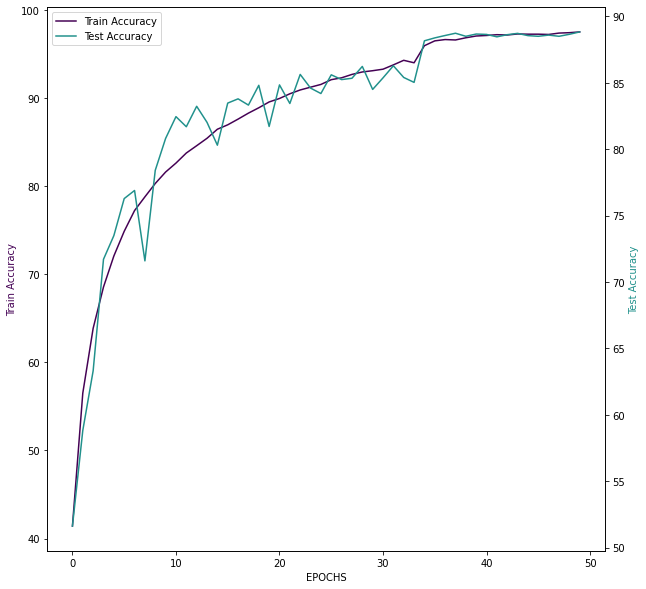

In [4]:
dm.plot_test_train_accuracy()

## Plotting Validation Accuracy

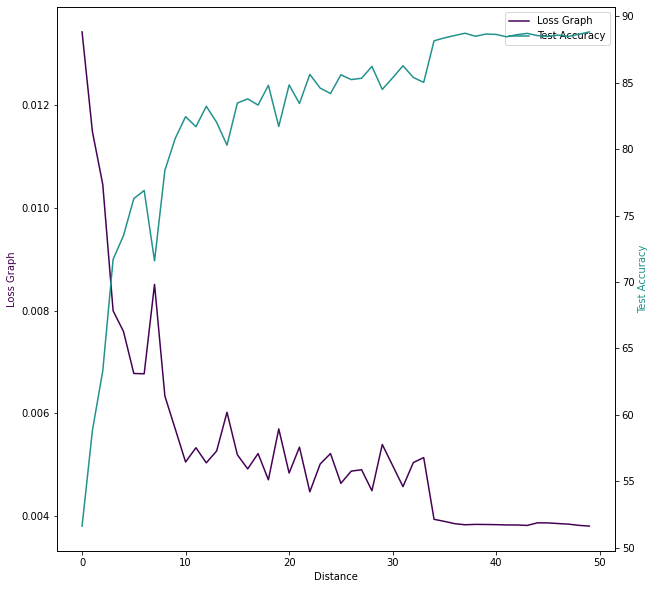

In [5]:
dm.plot_loss_accuracy()

## Plotting Misclassified Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

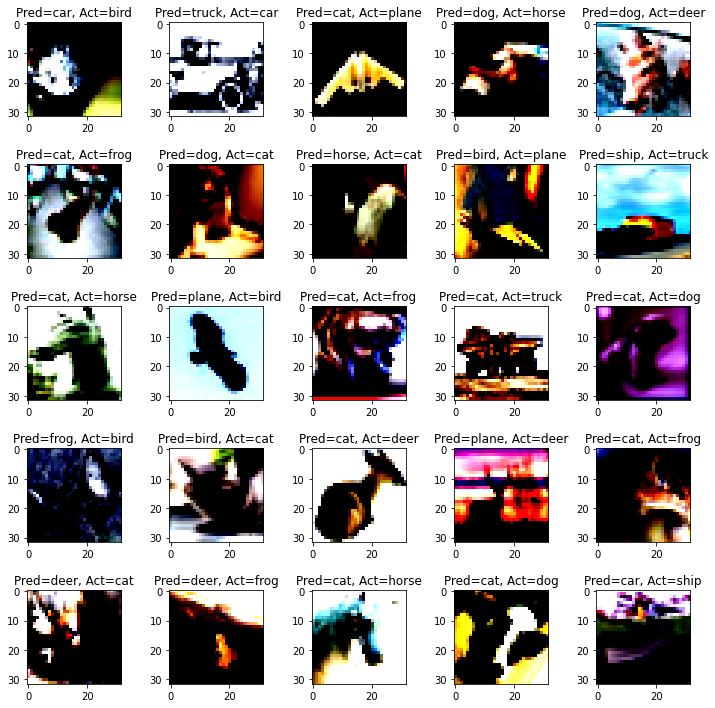

In [6]:
dm.plot_misclassified()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

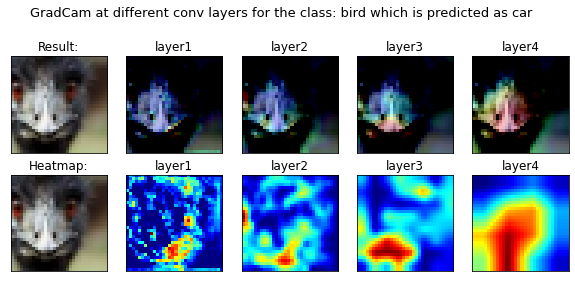

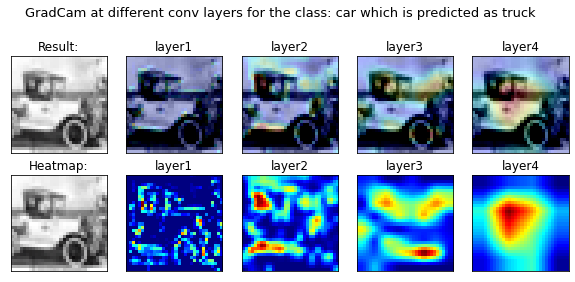

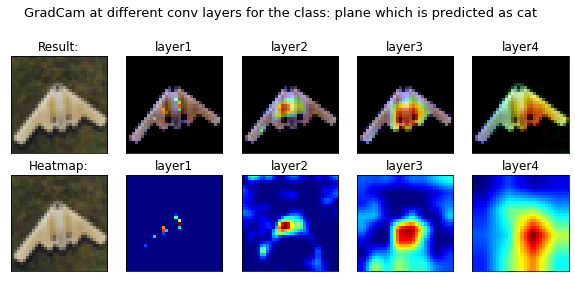

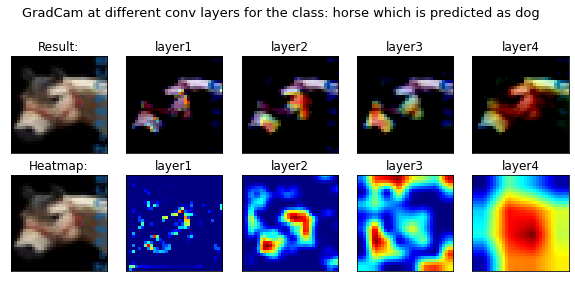

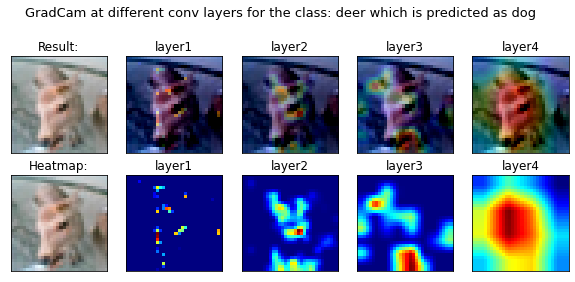

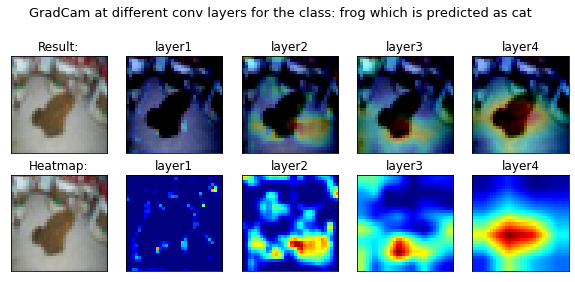

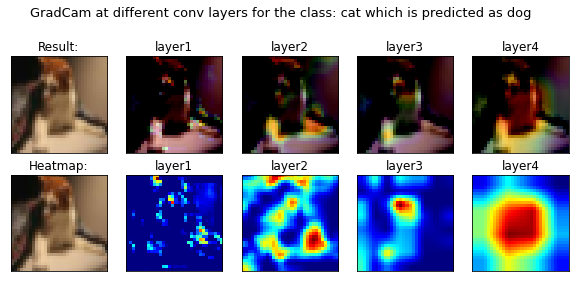

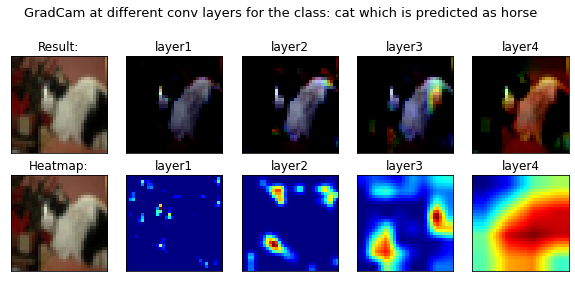

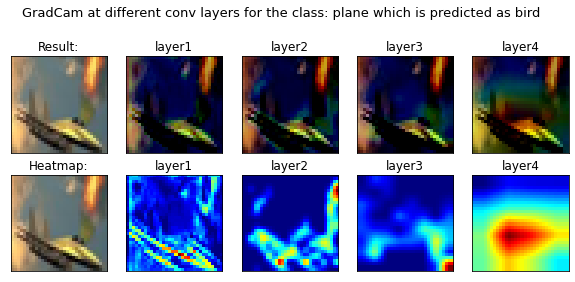

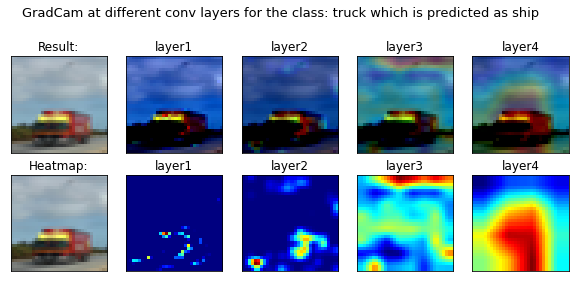

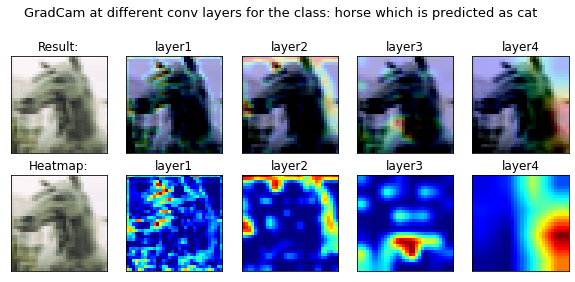

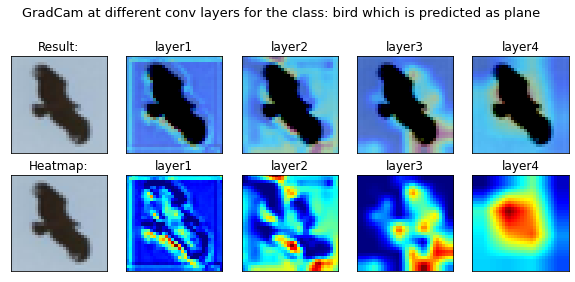

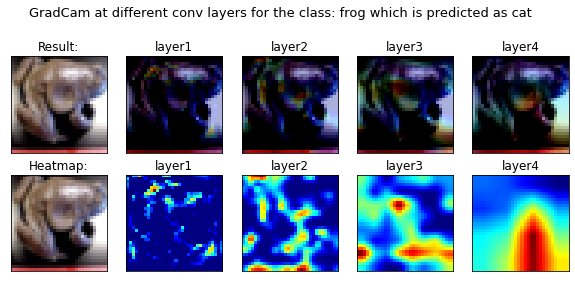

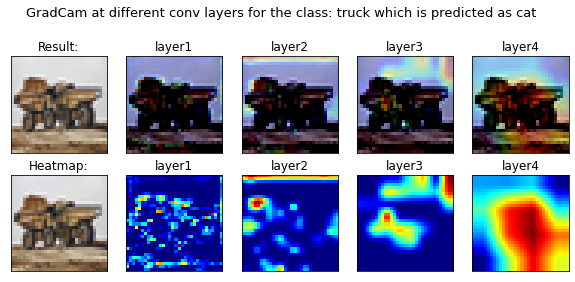

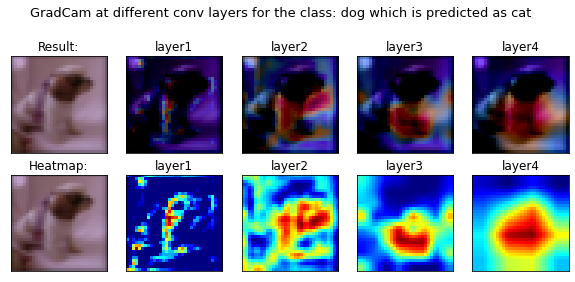

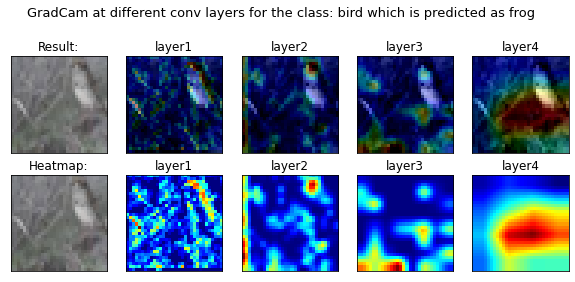

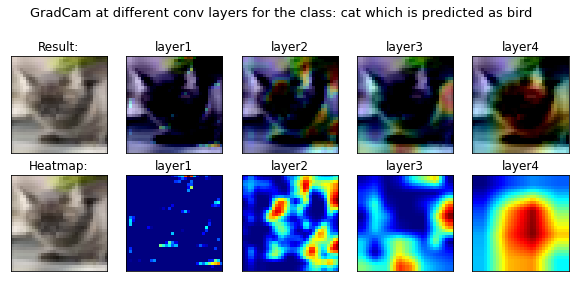

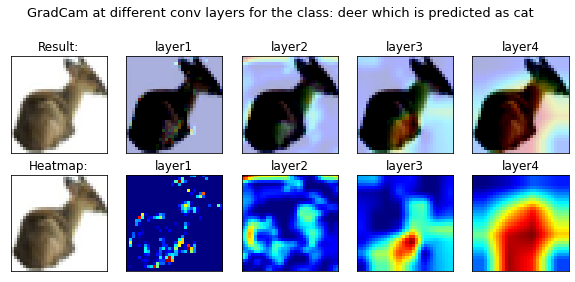

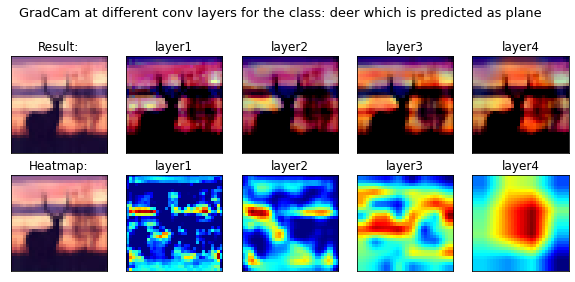

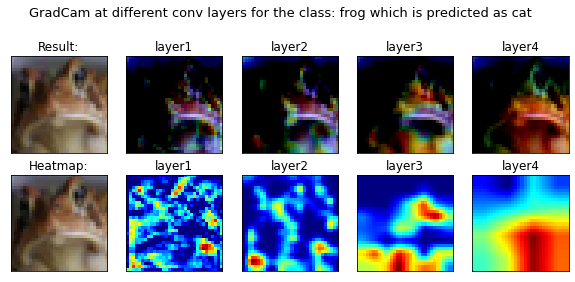

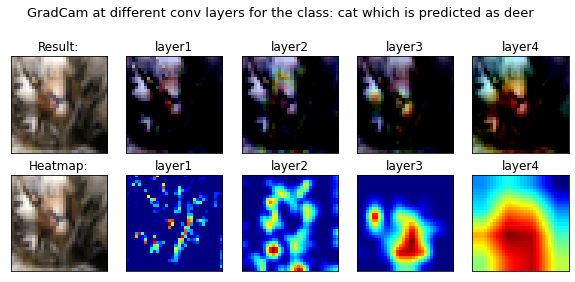

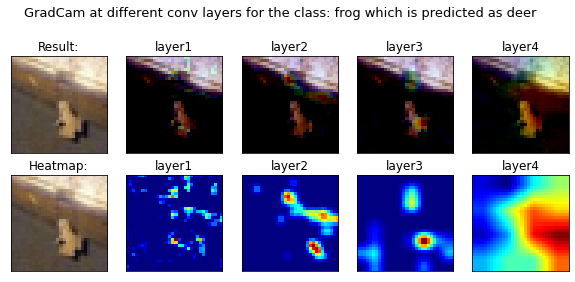

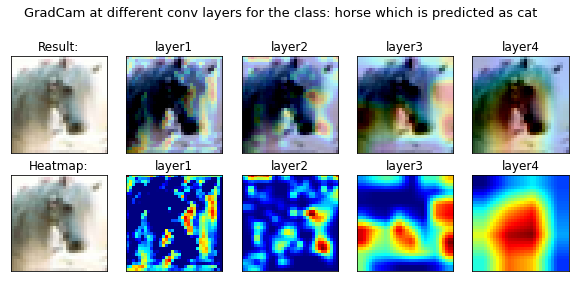

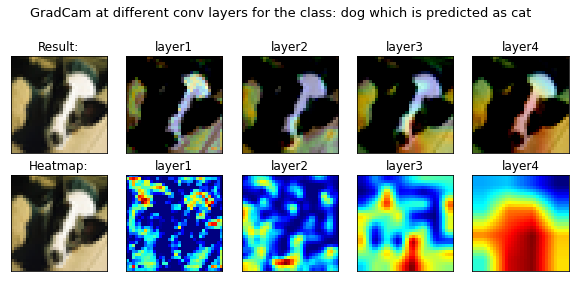

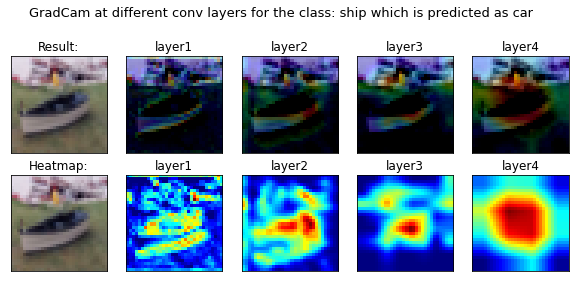

In [7]:
dm.plot_GRADcam(["layer1","layer2","layer3","layer4"])

## Plot LR FInder

  pip install torch-lr-finder -v --global-option="amp"



Learning rate search finished. See the graph with {finder_name}.plot()


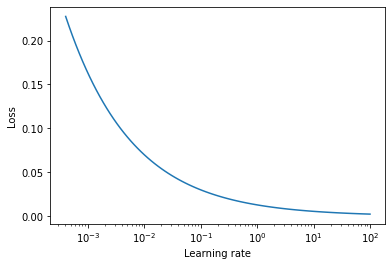

In [8]:
from lrfinder import LRFinder

lr_finder = LRFinder(model, optimizer, criterion, device)
lr_finder.range_test(img_data.trainloader, val_loader=img_data.testloader, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot(skip_end=0)
